# Bivariate Analysis

The term bivariate analysis refers to the analysis of two variables. You can remember this because the prefix “bi” means “two.”

The purpose of bivariate analysis is to understand the relationship between two variables

Bivariate analysis is slightly more analytical than Univariate analysis. When the data set contains two variables and researchers aim to undertake comparisons between the two data set then Bivariate analysis is the right type of analysis technique.


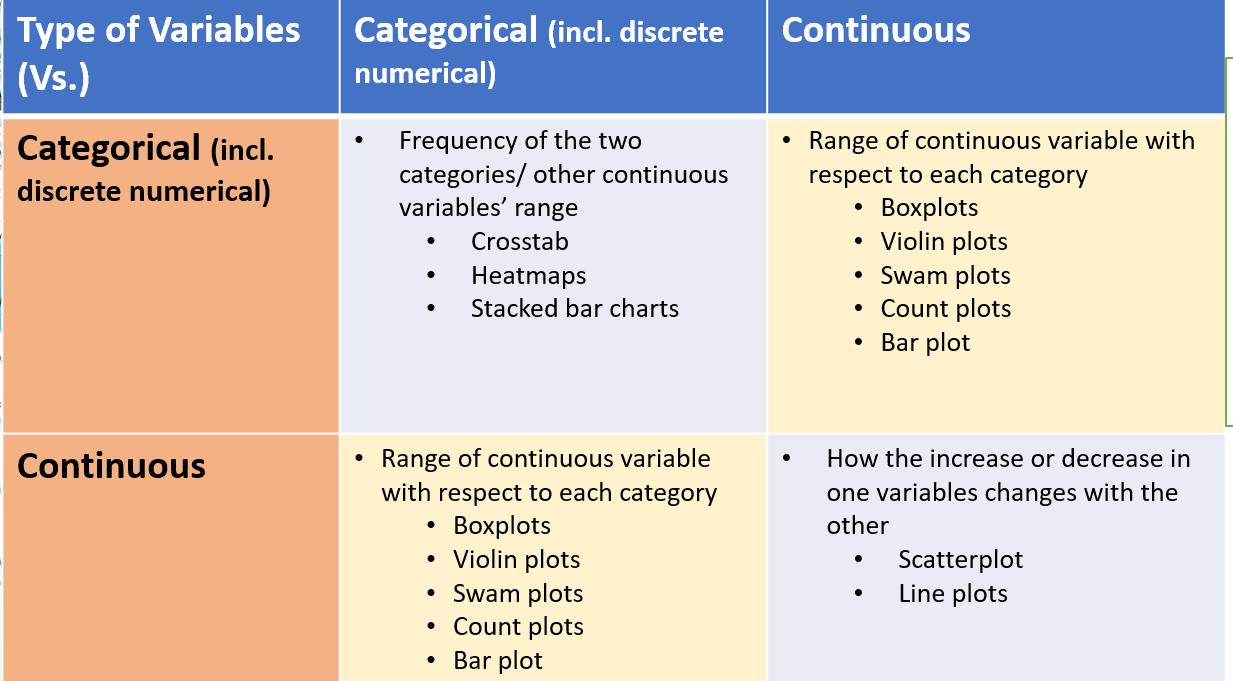

In [1]:
## Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

import sys
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use("bmh")

DATASET_PATH = "/content/clean_dataset.csv"
df = pd.read_csv(DATASET_PATH)

## Cleaning steps - numerical to categorical

## Numerical Variables
numerical = ['Age','Debt','YearsEmployed','CreditScore','Income']

## Convert numerical variables to categorical variables
num_cat = ['Gender','Married','BankCustomer','PriorDefault','Employed','DriversLicense','Approved']

df[num_cat] = df[num_cat].astype('category')

## Categorical Variables
cat = ['Industry','Ethnicity','Citizen']
cat_df = df.select_dtypes('object')

df[cat] = cat_df.astype('category')

In [2]:
df.drop('ZipCode',axis=1,inplace=True)

In [3]:
df.describe(include='all')

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
count,690.0,690.000000,690.000000,690.0,690.0,690,690,690.000000,690.0,690.0,690.00000,690.0,690,690.000000,690.0
unique,2.0,NaN,NaN,2.0,2.0,14,5,NaN,2.0,2.0,NaN,2.0,3,NaN,2.0
top,1.0,NaN,NaN,1.0,1.0,Energy,White,NaN,1.0,0.0,NaN,0.0,ByBirth,NaN,0.0
freq,480.0,NaN,NaN,525.0,527.0,146,408,NaN,361.0,395.0,NaN,374.0,625,NaN,383.0
mean,NaN,31.514116,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,1017.385507,NaN
std,NaN,11.860245,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,NaN
25%,NaN,22.670000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,5.000000,NaN
75%,NaN,37.707500,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,395.500000,NaN




### Bivariate Analysis of Continuous Variables - Quantative Analysis

The first step in performing bivariate analysis between continuous variables would be to calculate correlations between them. Use corr function to construct the correlation matrix.

Correlation is a statistical measure that expresses the extent to which two variables are linearly related.


Linear vs Non-Linear Correlations: https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/#:~:text=Pearson%20correlation%3A%20Pearson%20correlation%20evaluates,rather%20than%20the%20raw%20data.

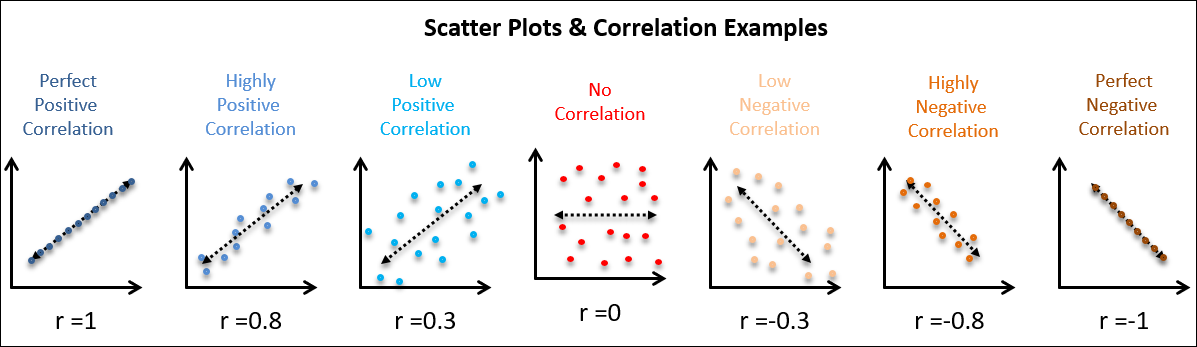

In [4]:
numerical_variables = df.select_dtypes(['int64','float64'])

In [5]:
correlations = numerical_variables.corr()

correlations

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.202177,0.391464,0.187327,0.018719
Debt,0.202177,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.391464,0.298902,1.000000,0.322330,0.051345
CreditScore,0.187327,0.271207,0.322330,1.000000,0.063692
Income,0.018719,0.123121,0.051345,0.063692,1.000000


There is a medium positive correlation between Age and Years of Employment of course. and then there is a medium positive correlation between Credit Score and Years of Employment, surprising to see Debt coming up as well.

Though in this dataset, we don’t see any strong correlation between any two continuous variables, in some datasets, continuous variables could be strongly correlated and the values of one might depend on others.

We can also draw line plots and scatterplots to see a relation between the two continuous variables.

Text(0.5, 0.98, 'Relationship between Age and Income')

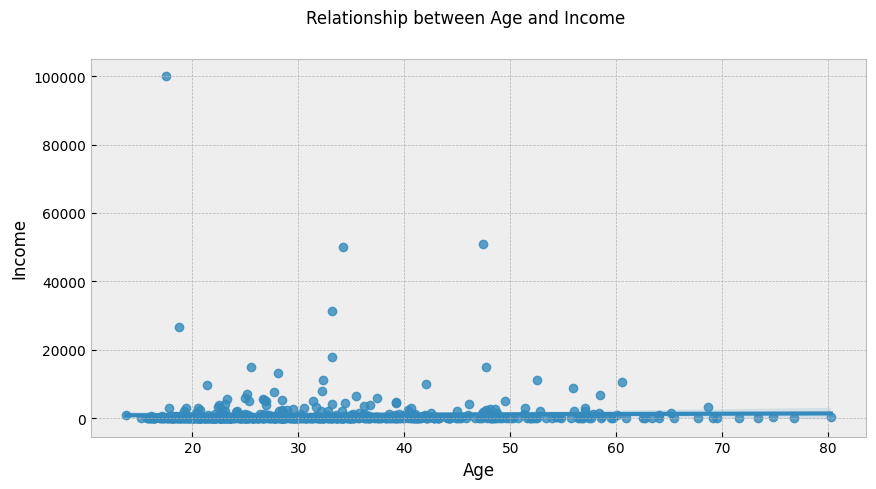

In [35]:
fig,ax  = plt.subplots(1,1,dpi=100,figsize=(10,5))

sns.regplot(x='Age',y='Income',data=df,ax=ax)
fig.suptitle("Relationship between Age and Income")

We cannot decipher a relarionship between Age and Income here. There is definitely an outlier who is well below the age of 20 and earns in six figures. Either this is a data entry error, or this is a wonder kid - who may have made a lot of money through investments or even family business.

Definitely we see a few samples with good amount of income during ages 20-40. 

Text(0.5, 0.98, 'Relationship between years of Employment and CreditScore')

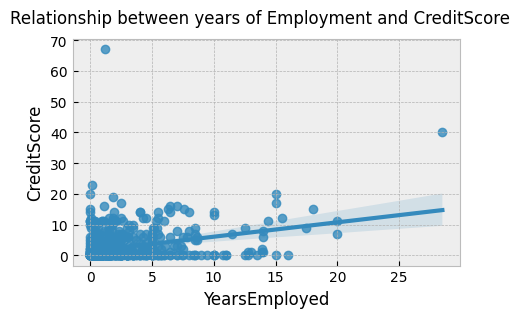

In [38]:
fig,ax  = plt.subplots(1,1,dpi=100,figsize=(5,3))

sns.regplot(x='YearsEmployed',y='CreditScore',data=df,ax=ax)
fig.suptitle("Relationship between years of Employment and CreditScore")

We can definitely see that the wonder kid or the data entry error shows 0 years of employment here. Needs to be flagged and investigated further.

There is a slight increasing trend line but isn't so subtle. Many of those who applied didn't make a large whopping salary after being employed for more than 10 years.

Text(0.5, 0.98, 'Relationship between Age and years of Employment')

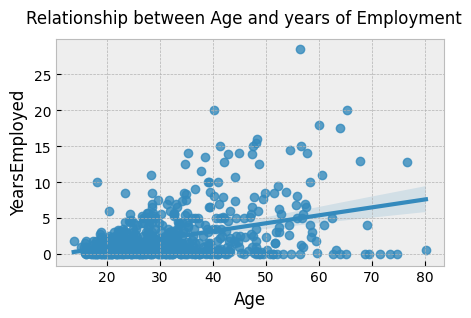

In [39]:
fig,ax  = plt.subplots(1,1,dpi=100,figsize=(5,3))

sns.regplot(x='Age',y='YearsEmployed',data=df,ax=ax)
fig.suptitle("Relationship between Age and years of Employment")

Of course, more the seniority, more the years of being employed, but we can definitely see that some of them are not employed. and we see a lot of dedicated workoholics in this plot.

Text(0.5, 0.98, 'Relationship between Debt and years of Employment')

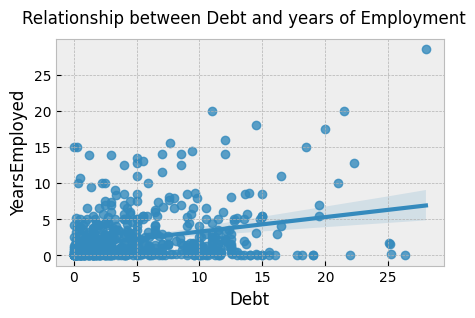

In [42]:
fig,ax  = plt.subplots(1,1,dpi=100,figsize=(5,3))

sns.regplot(x='Debt',y='YearsEmployed',data=df,ax=ax)
fig.suptitle("Relationship between Debt and years of Employment")

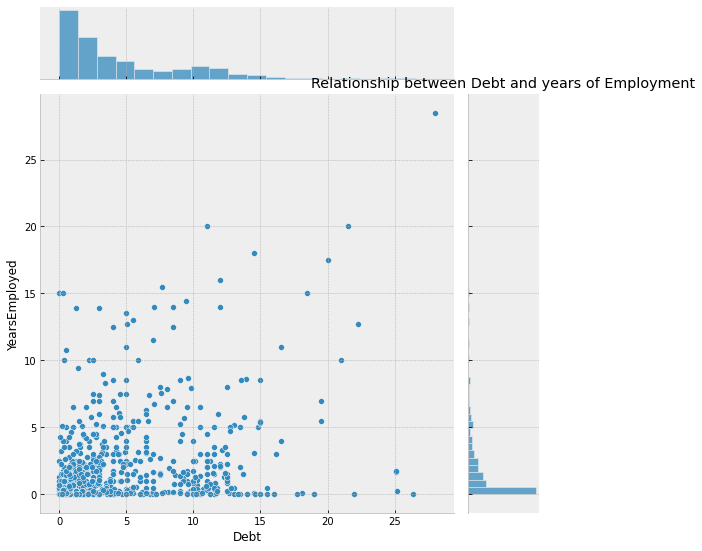

In [43]:
g = sns.jointplot(x='Debt',y='YearsEmployed',data=df);
g.fig.set_size_inches(8, 8)
plt.title("Relationship between Debt and years of Employment");

There are a lot of people with no debt, but some of them are all ove the place. There are some people with high debt and no employment, there is one person with more than 25 years of debt despite being employed for 25 years, too many loans?

### Bivariate Analysis of Continuous Variables vs Categorical Variables - Quantative vs Qualitative Analysis

Now we will try to see how values of continuous variables behave for different values of categorical variables.

We will use the ‘Approved’ column of the data as the categorical variable for our analysis. Comparing the column ‘Approved’ column with other columns can provide us with some useful insights.

### Group By aggregation

In [10]:
## Numerical Variables
numerical = ['Age','Debt','YearsEmployed','CreditScore','Income']

df.groupby('Approved')[numerical].mean()

,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


We can see:
* On an average more the years of being employed more the chances of being approvied.
* Descent credit score people and income get approved here.
* Age is all over the place, there is no bias here.
* Surprising to see that, on an average those with more debt years have been approved. 

In [11]:
## Numerical Variables
numerical = ['Age','Debt','YearsEmployed','CreditScore','Income']

df.groupby('Approved')[numerical].agg([np.mean,np.std])

Age                 Debt           YearsEmployed            \
               mean        std      mean       std          mean       std   
Approved                                                                     
0         29.773029  10.777571  3.839948  4.337662      1.257924  2.120481   
1         33.686221  12.774745  5.904951  5.471485      3.427899  4.120792   

         CreditScore                 Income               
                mean       std         mean          std  
Approved                                                  
0           0.631854  1.900049   198.605744   671.608839  
1           4.605863  6.320242  2038.859935  7659.763941

Definitely see that for debt, years employed, credit score and income, it is very much spread out and there is more than what meets the eye. So always remember an average gives you an understanding, but don't conclude just based on that, look at the spread of the data.

In [12]:
## Numerical Variables
numerical = ['Age','Debt','YearsEmployed','CreditScore','Income']

df.groupby('Gender')[numerical].mean()

,Age,Debt,YearsEmployed,CreditScore,Income
Gender,,,,,
0,30.886190,5.072690,1.785857,2.580952,1033.62381
1,31.788833,4.621365,2.414833,2.320833,1010.28125


There is negligible bias based on Gender here. We see almost all variables are on an average almost the same.

### Density Plots with Hue/color

A kernel density estimate (KDE) plot is a method for creating a curve out of the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous density curve in one or more dimensions.

Read this: https://mathisonian.github.io/kde/


We will plot KDE plots of continous variables with hue=’Approved’, we use kdeplots or distplots with kde = True, to create a distribution using seaborn.

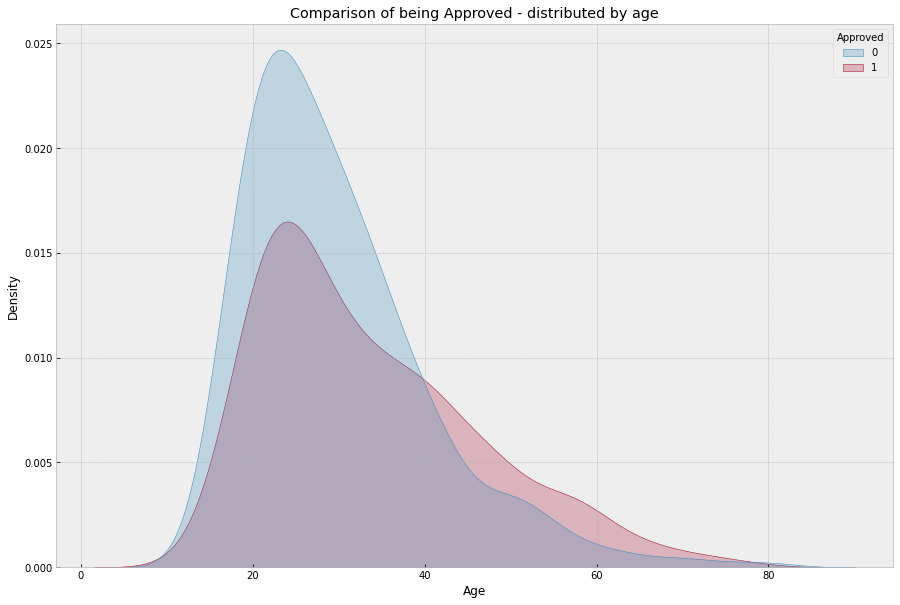

In [47]:
plt.figure(figsize = (15,10))
sns.kdeplot(data=df,x='Age',hue='Approved',fill=True)
plt.title('Comparison of being Approved - distributed by age')
plt.show();

We see those who weren't approved, a larger number of people  fall in the range 18 to 38. not approved people has a smaller spread and is more peaked.

A large number of approved fall in the range from 18 to 25 and then you have a relatively few senior people who got their credit cards approved. A lot of youngsters apply for their credit card early.

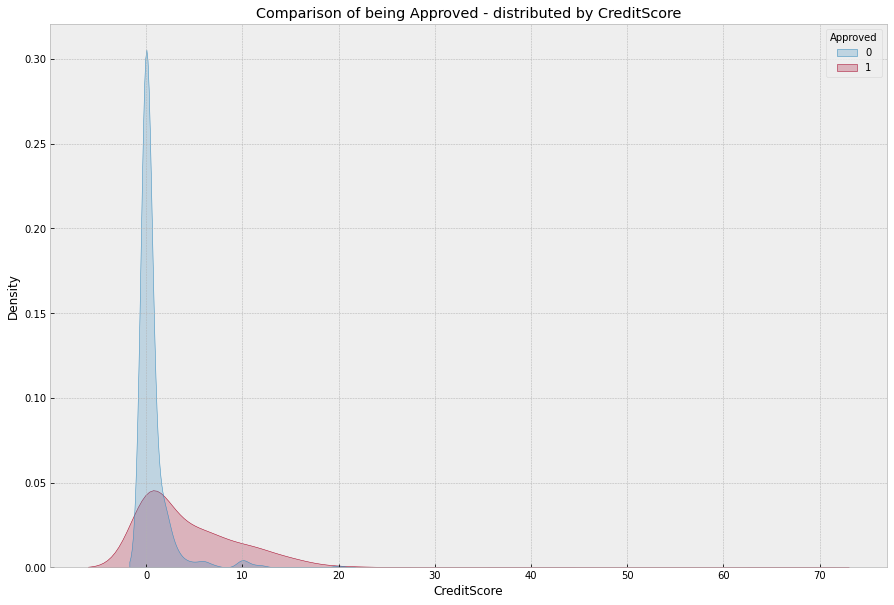

In [48]:
plt.figure(figsize = (15,10))
sns.kdeplot(data=df,x='CreditScore',hue='Approved',fill=True)
plt.title('Comparison of being Approved - distributed by CreditScore')
plt.show();

Definitely we see that a many who weren't approved had a low credit score, except a few exceptions who might have a good score, but due to other factors like income, or background check, may not have been approved.

Definitely see those we were approved had a larger spread and there are many around with good enough credit scores and an outlier all the way with a credit score above 50.

## Boxplots with Breakdown

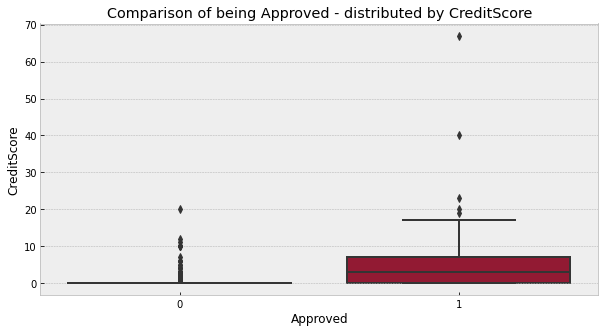

In [15]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df,y='CreditScore',x='Approved')
plt.title('Comparison of being Approved - distributed by CreditScore')
plt.show();

Using boxplots to compare shows, simply that those who were approved have a larger spread. also you can see there are 4-5 outliers with high credit score, but the upper whiskey goes uptil 18 score. We see outliers of good enough credit score and don't have a approval.

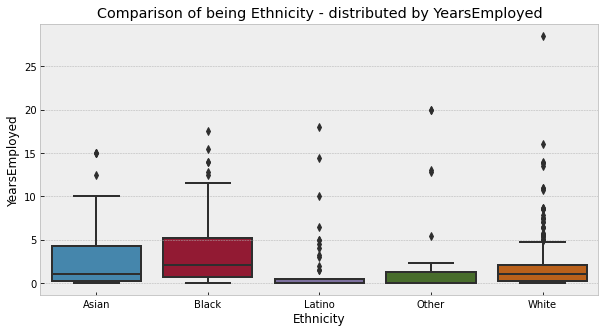

In [16]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df,y='YearsEmployed',x='Ethnicity')
plt.title('Comparison of being Ethnicity - distributed by YearsEmployed')
plt.show();

Definitely see a higher spread of black people and Asians applying with higher years of employment, for latino, white and others the spread is low, but definitely there are multiple exceptions once you see the outliers. The dedicated workholic who had was employed for more than 25 years and has more than 25 years of debt is a white person, one can investigate this person and the wonder kid more, these are anomalous people.

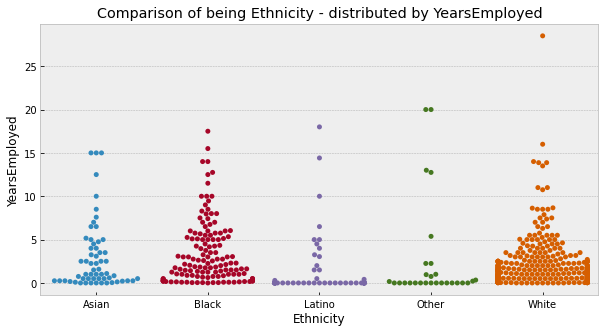

In [17]:
plt.figure(figsize = (10,5))
sns.swarmplot(data=df,y='YearsEmployed',x='Ethnicity')
plt.title('Comparison of being Ethnicity - distributed by YearsEmployed')
plt.show();

Amother way of looking at the same chart, you can see the number of datapoints as a rough estimate at every year of employment here. Many latinos don't have any years of employment, same with others.

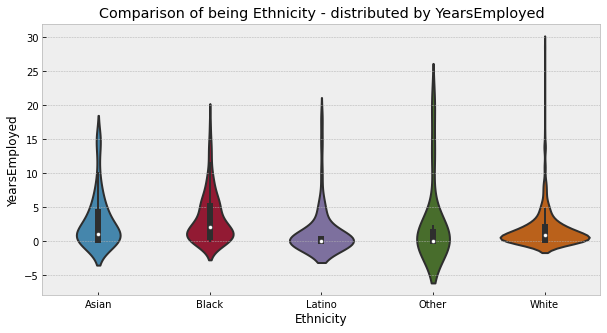

In [18]:
plt.figure(figsize = (10,5))
sns.violinplot(data=df,y='YearsEmployed',x='Ethnicity')
plt.title('Comparison of being Ethnicity - distributed by YearsEmployed')
plt.show();

Another way of looking at it, the violin plot

## Bivariate Analysis of Categorical Variables vs Categorical Variables:

Now we will try to see the relationship between categorical variables. Again we will keep the ‘Approved’ column fixed and will compare it with other columns.

#### Countplot with Hue + Crosstabs
We will plot count plots of categorical variables with Hue=’Approved’

In [19]:
pd.crosstab(df.Gender,df.Approved)

Approved,0,1
Gender,,
0,112,98
1,271,209


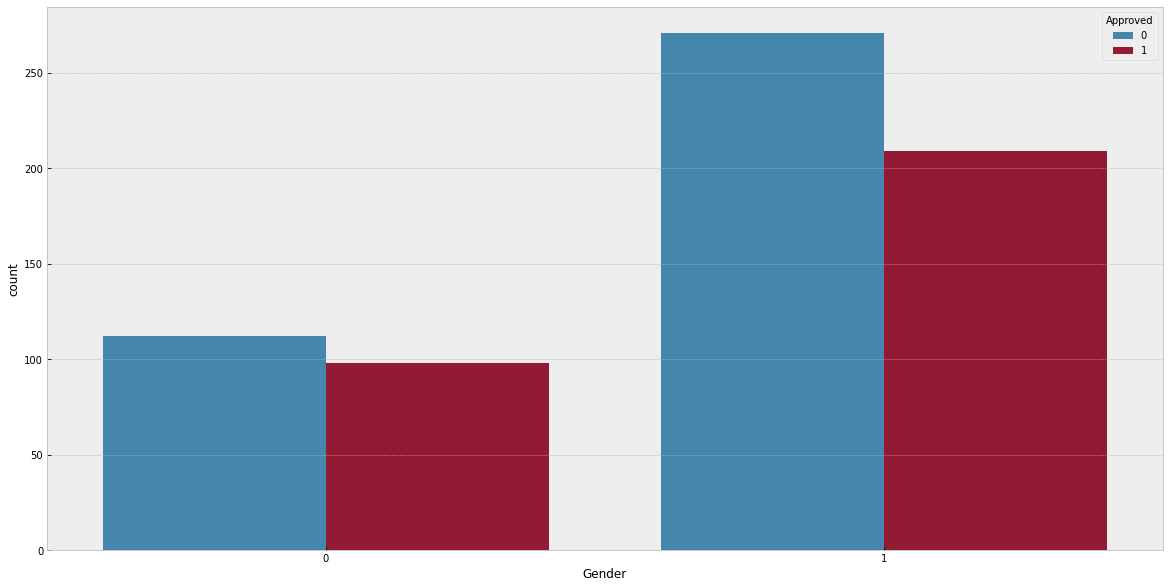

In [20]:
sns.countplot(data=df,x='Gender',hue='Approved')

Grouped bar chart shows, out of 480 male, 209 were approved and out of 210 female, 98 were approved.

In [54]:
pd.crosstab(df.Married,df.Approved)

Approved,0,1
Married,,
0,118,47
1,265,260


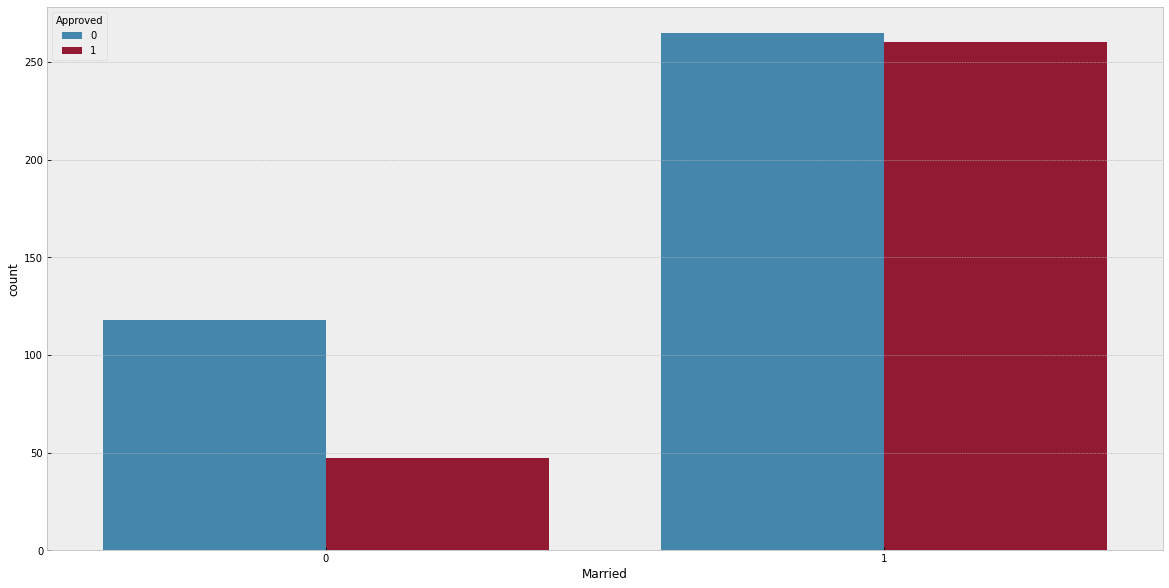

In [22]:
sns.countplot(data=df,x='Married',hue='Approved')

sadly, most people who were married, were not approved that's 38.4% of the chunk, and 37.7% of people were married and approved, 17.1% were unmarried and not approved.

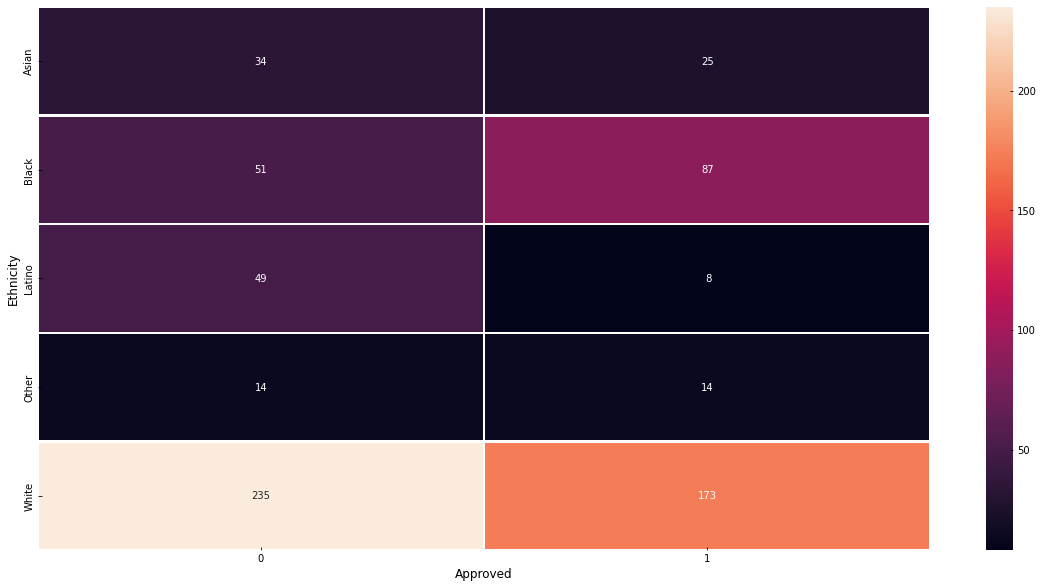

In [64]:
cross = pd.crosstab(df.Ethnicity,df.Approved)

sns.heatmap(cross,annot=True,linewidth=1.2,fmt = '2.0f');

we can definitely see the proportion of approved ethnicities, 25% were whites , 13% were black, 3.6% were asian, 2% were other, 1.2% were latinos.

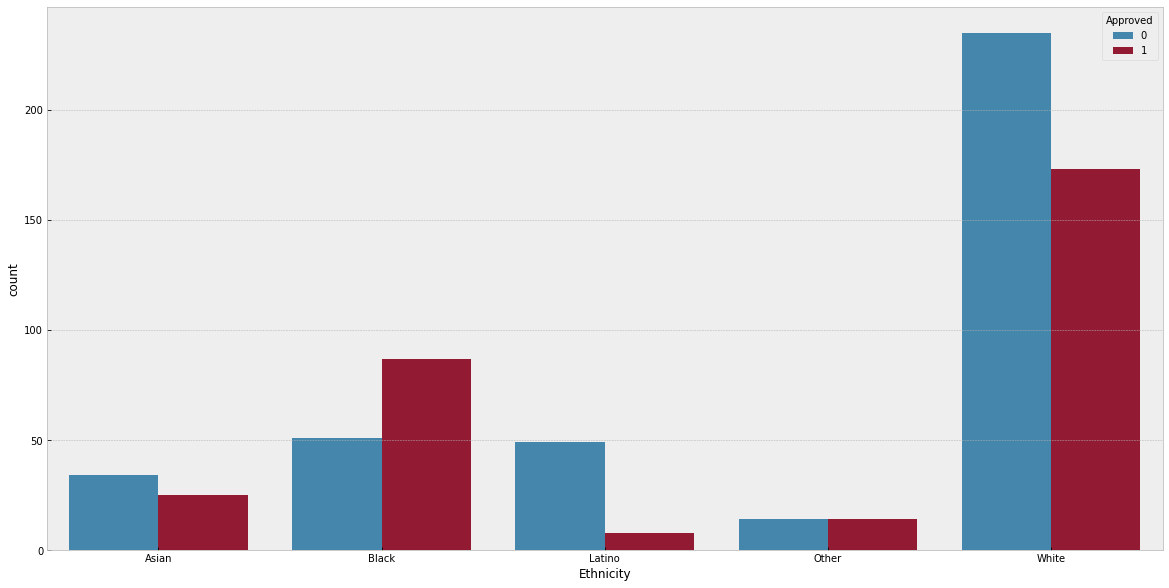

In [24]:
sns.countplot(data=df,x='Ethnicity',hue='Approved')

Definitely see that out of the black people who applied, most of them were approved, that's not the story for the rest of the ethnicities.

\## ADVANCED MATERIAL (OPTIONAL)

## Statistical Tests

Before this section : 
Please readup on pvalues, confidence intervals hypothesis testing
* p-values - https://en.wikipedia.org/wiki/P-value
* p-values - https://statquest.org/p-values-what-they-are-and-how-to-interpret-them/
* Hypothesis Testing - https://statquest.org/hypothesis-testing-and-the-null-hypothesis/
* Confidence Intervals - https://statquest.org/confidence-intervals-clearly-explained/
* T-tests - https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%20test%20is%20a,are%20different%20from%20one%20another.
* ANOVA - https://www.simplypsychology.org/anova.html#:~:text=An%20ANOVA%20test%20is%20a,into%202%20or%20more%20groups.
* T-tests and ANOVA: https://statquest.org/statquest-glms-pt-2-t-tests-and-anova/





#### **Question Is there a statistically significance between people approved vs not approved for a credit card taking into consideration their credit score? That is Higher Credit Score, more chances of being Approved for a credit card?**

**What test can we run?**

T-TEST



**What is it?**

A t-test is a statistic method used to determine if there is a significant difference between the means of two groups based on a sample of data.
The test relies on a set of assumptions for it to be interpreted properly and with validity.
Among these assumptions, the data must be randomly sampled from the population of interest and the data variables must follow a normal distribution.

Let's run a t-test here 

Hypothesis

H0: The effect of being approved and not approved for a credit card on Credit Score are equal i.e., μ1 = μ2

H1: The effect of being approved and not approved for a credit card on Credit Score is not equal i.e., μ1 ≠ μ2

What we saw?

Text(0.5, 1.0, 'Comparison of being Approved - distributed by CreditScore')

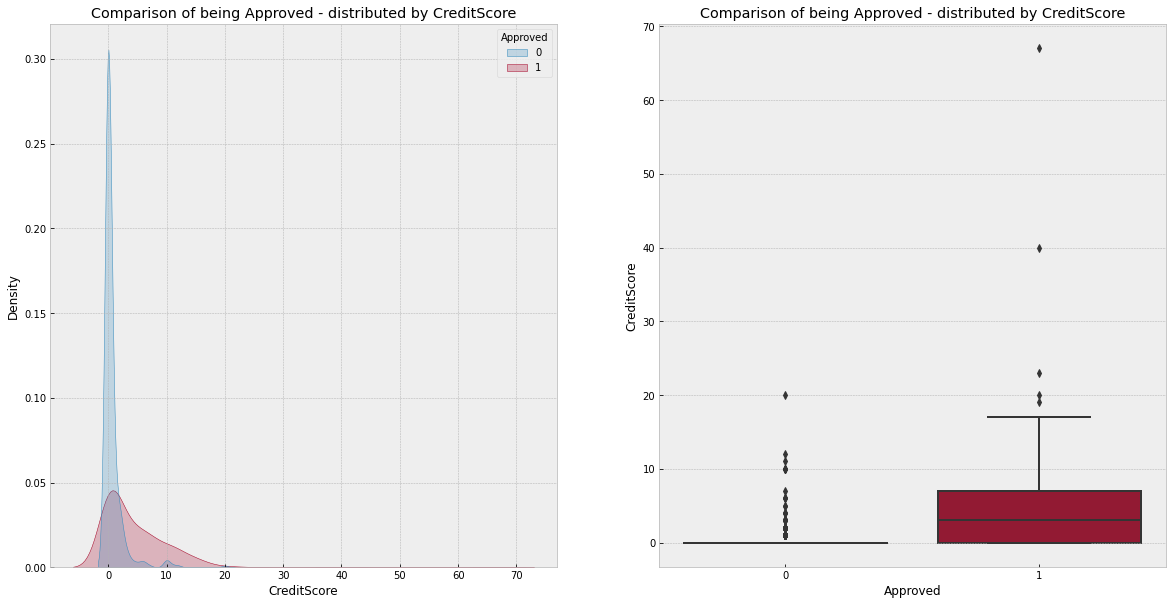

In [25]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
sns.kdeplot(data=df,x='CreditScore',hue='Approved',fill=True,ax=ax[0])
ax[0].set_title('Comparison of being Approved - distributed by CreditScore')

sns.boxplot(data=df,y='CreditScore',x='Approved',ax=ax[1])
ax[1].set_title('Comparison of being Approved - distributed by CreditScore')

Looking at this plot we could say there is a effect and the means are not equal, but let's test this out

In [65]:
from scipy import stats
approved = df.loc[df['Approved']==1,'CreditScore']
unapproved = df.loc[df['Approved']==0,'CreditScore']
t_value,p_value=stats.ttest_ind(approved,unapproved)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''','\n','So we conclude that The effect of being approved and not approved for a credit card on Credit Score are not equal i.e., μ1 != μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'\n','We do not reject the null hypothesis H0','\n','So we conclude that The effect of being approved and not approved for a credit card on Credit Score are equal i.e., μ1 = μ2 at 0.05 level of significance.')

Test statistic is 11.667004
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. 
 So we conclude that The effect of being approved and not approved for a credit card on Credit Score are not equal i.e., μ1 != μ2 at 0.05 level of significance.


#### **Question Is there a statistically significance between people with different ethnicities applying for a credit card taking into consideration their credit score? That is, is there any racial bias in the system to have a good or low credit score, based on the data?**

Read up: https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/

Multiple Groups -  multiple ethnicities


**What test can we run?**

One way - ANOVA - Analysis of Variance

**What are the assumptions?**


The assumptions of the ANOVA test are the same as the general assumptions for any parametric test:

* An ANOVA can only be conducted if there is no relationship between the subjects in each sample. 
* This means that subjects in the first group cannot also be in the second group (e.g. independent samples/between-groups).
* The different groups/levels must have equal sample sizes.
* An ANOVA can only be conducted if the dependent variable is normally distributed, so that the middle scores are most frequent and extreme scores are least frequent.
* Population variances must be equal (i.e. homoscedastic). 
* Homogeneity of variance means that the deviation of scores (measured by the range or standard deviation for example) is similar between populations.


**What is One-way ANOVA?**
* A one-way ANOVA (analysis of variance) has one categorical independent variable (also known as a factor) and a normally distributed continuous (i.e., interval or ratio level) numeical variable.

* The independent variable divides cases into two or more mutually exclusive levels, categories, or groups.

* The one-way ANOVA test for differences in the means of the dependent variable is broken down by the levels of the independent variable.

* An example of a one-way ANOVA includes testing a therapeutic intervention (CBT, medication, placebo) on the incidence of depression in a clinical sample.


Hypothesis:

A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)


H1 (alternative hypothesis): It states that there will be at least one population mean that differs from the rest


*Note: Both the One-Way ANOVA and the Independent Samples t-Test can compare the means for two groups. However, only the One-Way ANOVA can compare the means across three or more groups.*



Text(0.5, 1.0, 'Comparison of being Ethnicity - distributed by CreditScore')

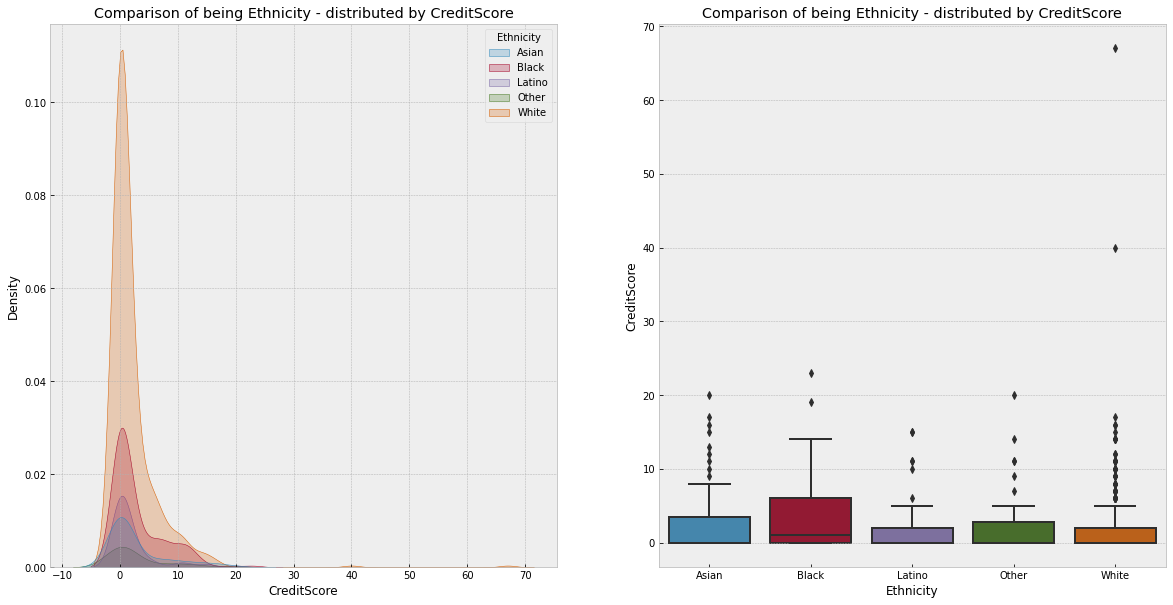

In [27]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
sns.kdeplot(data=df,x='CreditScore', hue='Ethnicity', 
            fill=True,ax=ax[0])

ax[0].set_title('Comparison of being Ethnicity - distributed by CreditScore')

sns.boxplot(data=df,y='CreditScore', x='Ethnicity', ax=ax[1])
ax[1].set_title('Comparison of being Ethnicity - distributed by CreditScore')

In [28]:
# Conduct the one-way ANOVA

## Assuming Alpha or significance level to be 0.05
white = df.loc[df['Ethnicity']=='White','CreditScore']
asian = df.loc[df['Ethnicity']=='Asian','CreditScore']
black = df.loc[df['Ethnicity']=='Black','CreditScore']
latino = df.loc[df['Ethnicity']=='Latino','CreditScore']
other = df.loc[df['Ethnicity']=='Other','CreditScore']
stats.f_oneway(white, asian, black, latino,other)

F_onewayResult(statistic=1.322440630647515, pvalue=0.2600259931452938)

The F statistic and p-value turn out to be equal to 1.322 and 0.26 respectively. Since the p-value is more than 0.05(alpha) hence we would fail to reject the null hypothesis. This implies that we have statistical proof to say that there does not exist a statistical difference in the Credit Score among the five different Ethnicities

**Note: Posthoc analysis can be carried out using Tukey's HSD -  To see which pair of groups differ here(White vs Black, Black vs Asian etc.)**
https://statisticsbyjim.com/anova/post-hoc-tests-anova/

https://www.statology.org/tukey-test-python/

## Chi-Squared Test for Categorical Relationship

A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. The data used in calculating a chi-square statistic must be random, raw, mutually exclusive, drawn from independent variables, and drawn from a large enough sample. For example, the results of tossing a fair coin meet these criteria.

Chi-square tests are often used to test hypotheses. The chi-square statistic compares the size of any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.


* https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
* https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test#:~:text=A%20chi%2Dsquare%20test%20is,between%20the%20variables%20under%20consideration.

### Question: Testing relationship between Ethnicity and Credit Card Approval?

We start by defining the null hypothesis (H0) which states that there is no relation between the variables. An alternate hypothesis would state that there is a significant relation between the two.

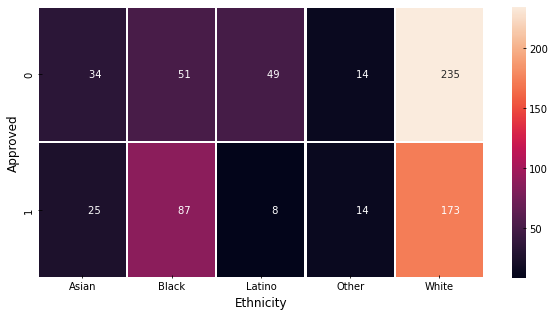

In [29]:
plt.figure(figsize = (10,5))

sns.heatmap(pd.crosstab(df.Approved,df.Ethnicity),annot=True,linewidth=1.2,fmt='10.0f');

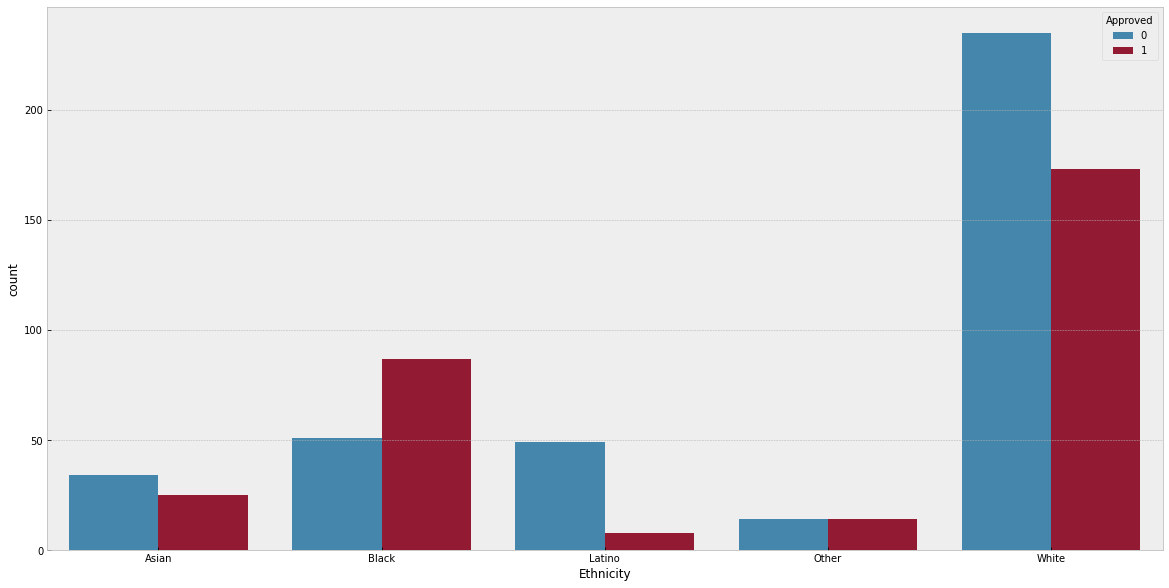

In [30]:
sns.countplot(data=df,x='Ethnicity',hue='Approved')

In [31]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df.Approved,df.Ethnicity))
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.823665654934685e-08
Dependent (reject H0)


Insight: There seems to be a dependency based on the statistical test. Hence there might be a relation between Credit Card Approval and Ethnicity.

**Note: Post hoc analysis to see group comparisons:**
https://neuhofmo.github.io/chi-square-and-post-hoc-in-python/